In [1]:
#LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score,roc_auc_score,classification_report,mean_squared_error,accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#READING
train=pd.read_csv('D:/R/loan prediction/train.csv')
test=pd.read_csv('D:/R/loan prediction/test.csv')

In [3]:
# BINDING
master=pd.concat([train,test],ignore_index=True)
print(train.shape,test.shape,master.shape)
master.head()

(614, 13) (367, 12) (981, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
### Chck Dtypes
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [5]:
# Check column names
print(master.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
# check na
master.isnull().sum()/len(master)*100

Loan_ID               0.000000
Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

In [7]:
# CHECK UNIQUE VALUES

master.apply(lambda x : len(x.unique()))

Loan_ID              981
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           233
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
Loan_Status            3
dtype: int64

In [8]:
cat=['Gender','Married','Credit_History','Self_Employed','Property_Area','Loan_Amount_Term','Education','Dependents']
num=['CoapplicantIncome','LoanAmount','ApplicantIncome']
final=master[cat+num]

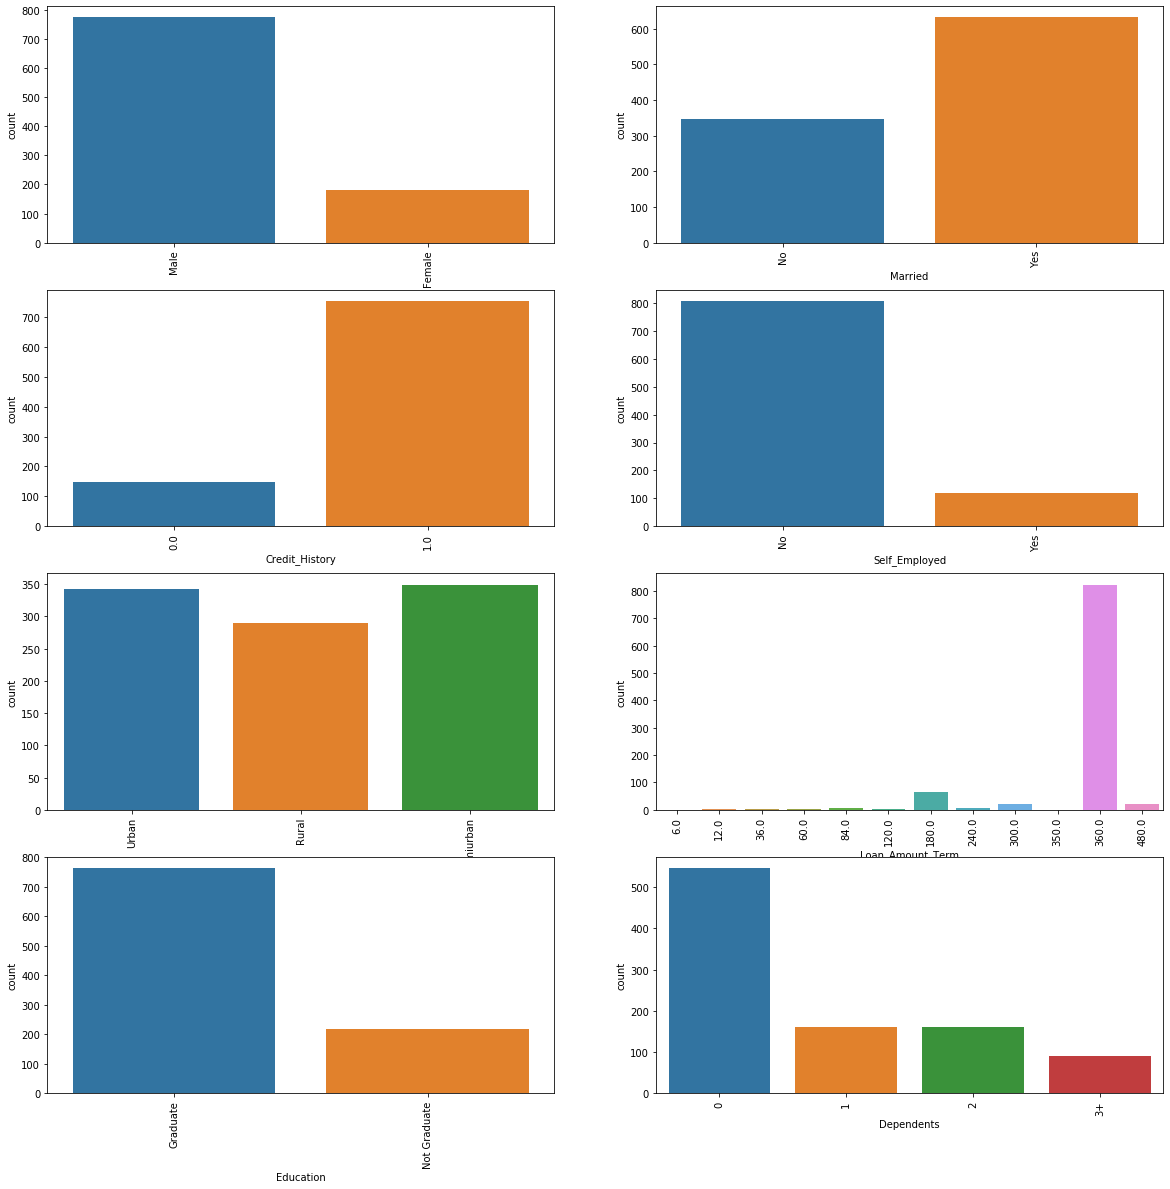

In [9]:
#CAT VARIABLE
fig, ax=plt.subplots(4,2,figsize=(20,20))
for variable,subplot in zip(cat,ax.flatten()):
    sns.countplot(final[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

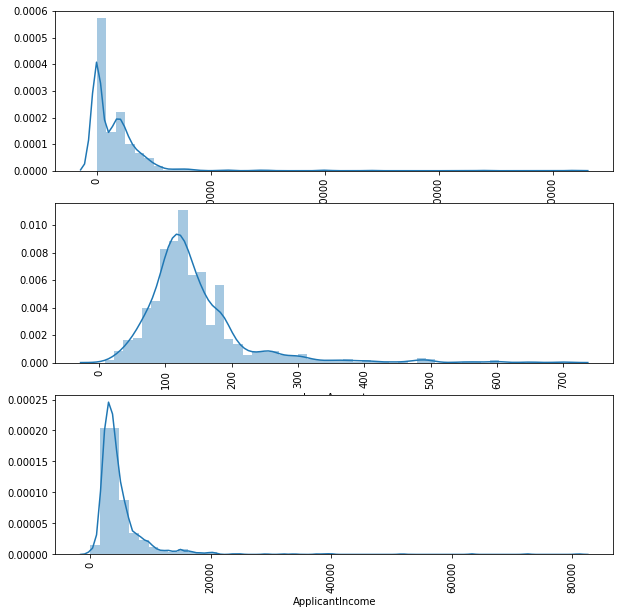

In [10]:
#Numerical
fig, ax=plt.subplots(3,figsize=(10,10))
for variable,subplot in zip(num,ax.flatten()):
    sns.distplot(final[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

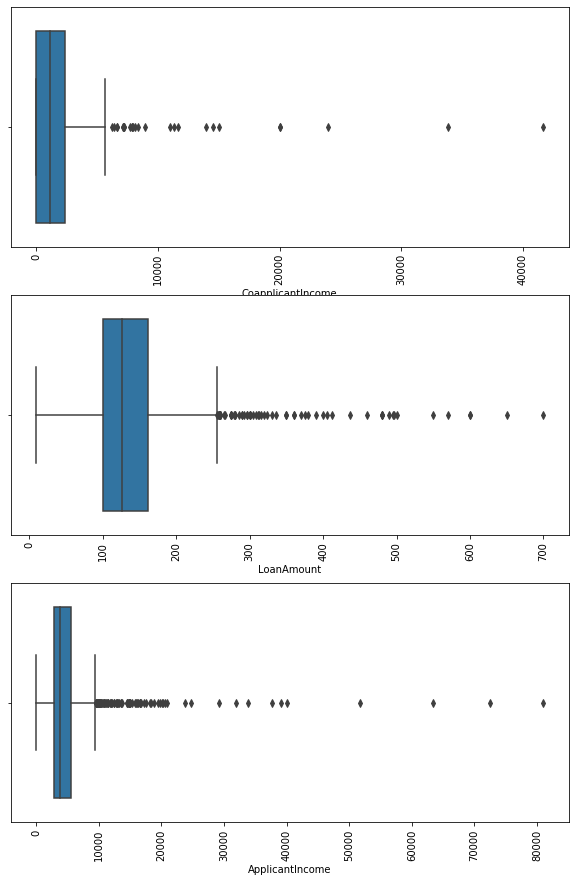

In [11]:
# VISUALISING BOXPLOT
fig, ax=plt.subplots(3,figsize=(10,15))
for variable,subplot in zip(num,ax.flatten()):
    sns.boxplot(final[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

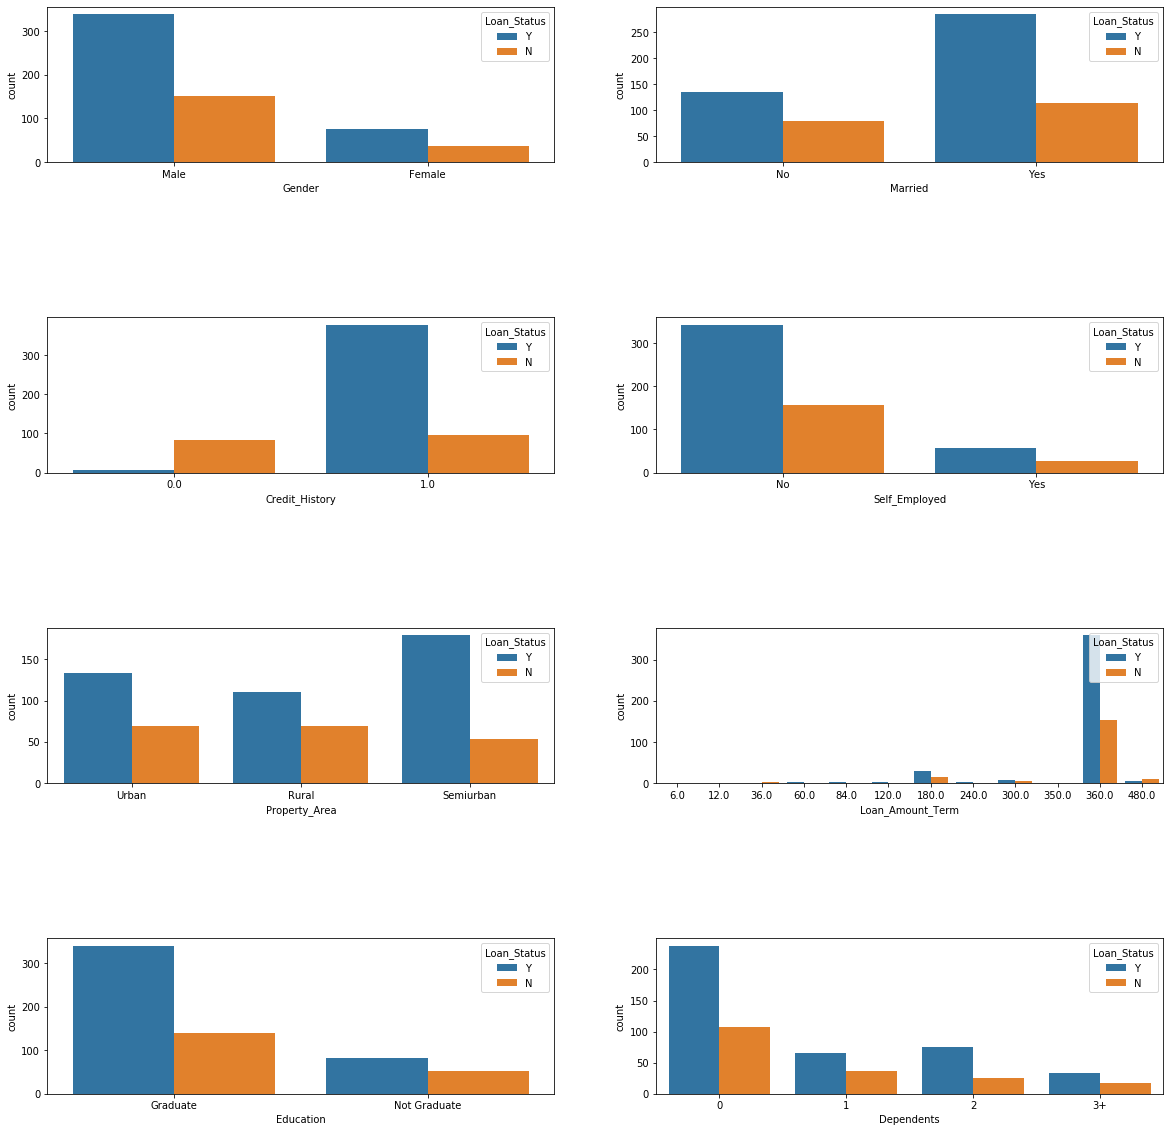

In [12]:
# Category vs Target
fig,axes = plt.subplots(4,2,figsize=(20,20))
for idx,cat_col in enumerate(cat):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=master,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

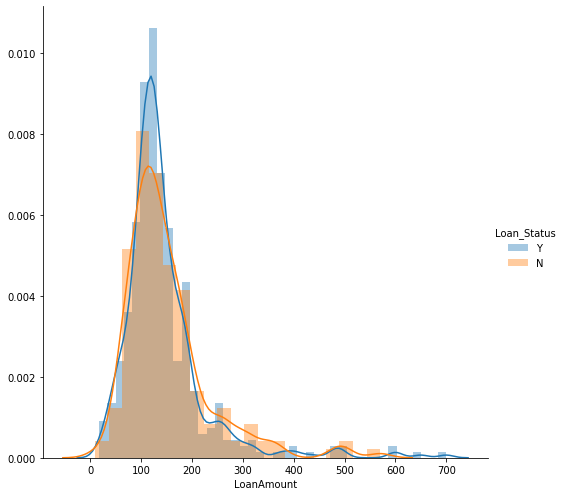

In [13]:
# Check LOan Status with Loan AMt
##AGE AROUND 20-40 HAS HIGHEST SURVIVAL RATE
sns.FacetGrid(master,hue="Loan_Status",size=7).map(sns.distplot,"LoanAmount").add_legend()

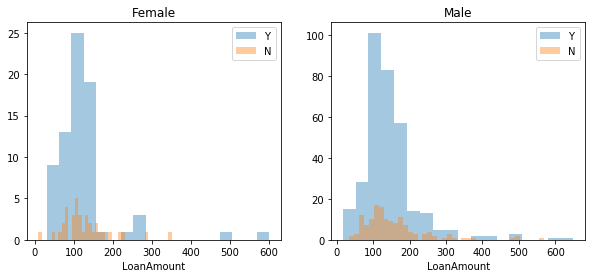

In [14]:
#CHECK LOAN STATUS UPON LOAN AMOUNT UPON THE GENDER  #AROUND 50 TO 200 L.AMT MALE HAS HIGHEST APPROVAL OF LOAN

status = 'Y'
not_status = 'N'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Gender']=='Female']
men = train[train['Gender']=='Male']
ax = sns.distplot(women[women['Loan_Status']=='Y'].LoanAmount.dropna(),label=status ,bins=18, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Loan_Status']=='N'].LoanAmount.dropna(),label=not_status, bins=40, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Loan_Status']=='Y'].LoanAmount.dropna(),label=status, bins=18, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Loan_Status']=='N'].LoanAmount.dropna(),label=not_status, bins=40, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [15]:
#############################MISSING TREATMENT##################################################
#1.GENDER
master.Gender.value_counts(dropna=False)
master.Gender=master.Gender.fillna('Male')
genders = {"Male": 0, "Female": 1}
master.Gender=master.Gender.map(genders)

In [16]:
#2.Married
master.Married.value_counts(dropna=False)
master.Married=master.Married.fillna('Yes')
marr= {"Yes":1,"No":0}
master.Married=master.Married.map(marr)
master.Married=master.Married.astype(int)

In [17]:
#3. DEpendents
master.Dependents.value_counts(dropna=False)
master['Dependents'] = master['Dependents'].str.rstrip('+')
master.Dependents.value_counts()
master['Dependents'] = master['Dependents'].fillna( master['Dependents'].dropna().mode().values[0] )
master.Dependents=master.Dependents.astype('str').astype(int)

In [18]:
#4.SELF EMPLOYED
master.Self_Employed.value_counts(dropna=False)
master['Self_Employed'] = master['Self_Employed'].fillna( master['Self_Employed'].dropna().mode().values[0] )
de= {'No':0,'Yes':1}
master.Self_Employed=master.Self_Employed.map(de)
master.Self_Employed.value_counts()

0    862
1    119
Name: Self_Employed, dtype: int64

In [19]:
#5.EDUCtion
master.Education.value_counts()
ed= {'Graduate':1,'Not Graduate':0}
master.Education=master.Education.map(ed)
master.Education=master.Education.astype(int)

64.0
4.0 260.0


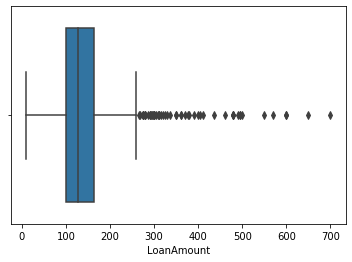

In [20]:
#6.LOANAMT
missing=master[master.LoanAmount.isna()]
missing.head()

# REPLACE LOAN AMT WITH RANDOM VALUE WITH RESPECT TO MEAN STD AND ISNULL
master.LoanAmount.describe()
mean = master["LoanAmount"].mean()
std = master["LoanAmount"].std()
is_null = master["LoanAmount"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_LoanAmount = np.random.randint(mean - std, mean + std, size = is_null)
 # fill NaN values in LoanAmount column with random values generated
LoanAmount_slice = master["LoanAmount"].copy()
LoanAmount_slice[np.isnan(LoanAmount_slice)] = rand_LoanAmount
master["LoanAmount"] = LoanAmount_slice
master["LoanAmount"] = master["LoanAmount"].astype(int)

###OUTLIER IDENTIFICATION###

sns.boxplot(master['LoanAmount'])

sorted(master['LoanAmount'])
quantile1,quantile3=np.percentile(master.LoanAmount,[25,75])

#IQR
iqr=quantile3-quantile1
print(iqr)
#UPPER AND LOWER BOUND
lb=quantile1 -(1.5 * iqr)
up=quantile3 +(1.5 * iqr)
print(lb,up)

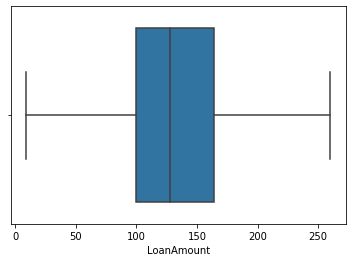

In [21]:
##TRATMENT##

master.LoanAmount.loc[master.LoanAmount > up]=up
sns.boxplot(master['LoanAmount'])

In [22]:
#LOAN_AMT
master['Loan_Amount_Term'] = master['Loan_Amount_Term'].fillna( master['Loan_Amount_Term'].dropna().mode().values[0] )

In [23]:
master['Loan_Amount_Term']=master['Loan_Amount_Term'].round().astype(str)
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    object 
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(3), int64(3), object(4)
memory usage: 88.3+ KB


In [24]:
####### CHANGING THE 6.0 TO 60.0 ANND 350.0 TO 360.0 AS LOAN CAN BE OF 6 MONTHS
master.head()
master['Loan_Amount_Term'].replace({'6.0':60.0,'350.0':360.0},inplace=True)
master['Loan_Amount_Term']=master['Loan_Amount_Term'].astype(int)

In [25]:
master.Loan_Amount_Term.value_counts()

360    844
180     66
480     23
300     20
240      8
84       7
120      4
60       4
36       3
12       2
Name: Loan_Amount_Term, dtype: int64

In [26]:
# CREDIT_HISTORY
master.Credit_History.value_counts(dropna=False)
master.Credit_History=master.Credit_History.fillna('Not.Av')
master.Credit_History.value_counts()

1.0       754
0.0       148
Not.Av     79
Name: Credit_History, dtype: int64

2365.0
-3547.5 5912.5


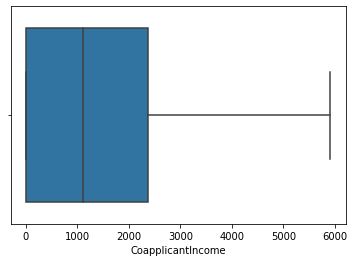

In [27]:
############################OUTLIER TREATMENT######################
#1.CO APPLICASNT INCOME\
sorted(master['CoapplicantIncome'])
quantile1,quantile3=np.percentile(master.CoapplicantIncome,[25,75])

#IQR
iqr=quantile3-quantile1
print(iqr)
#UPPER AND LOWER BOUND
lb=quantile1 -(1.5 * iqr)
up=quantile3 +(1.5 * iqr)
print(lb,up)

##TRATMENT##

master.CoapplicantIncome.loc[master.CoapplicantIncome > up]=up
sns.boxplot(master['CoapplicantIncome'])

2641.0
-1086.5 9477.5


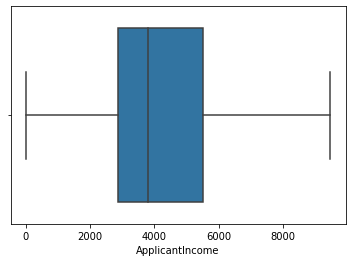

In [28]:
#2.Applicant_Income

sorted(master['ApplicantIncome'])
quantile1,quantile3=np.percentile(master.ApplicantIncome,[25,75])

#IQR
iqr=quantile3-quantile1
print(iqr)
#UPPER AND LOWER BOUND
lb=quantile1 -(1.5 * iqr)
up=quantile3 +(1.5 * iqr)
print(lb,up)

##TRATMENT##

master.ApplicantIncome.loc[master.ApplicantIncome > up]=up
sns.boxplot(master['ApplicantIncome'])

In [29]:
##############FEATURE ENGINEERING########### ## iir income to installment ratio $#icr-income coverge ratio

master['Total_Income']=master.ApplicantIncome+master.CoapplicantIncome
master['Installment']=master.LoanAmount / master.Loan_Amount_Term * 1000
master['Debt_Income']=master.LoanAmount / master.Total_Income * 1000
master['IIR_Ratio']=master.Installment / master.Total_Income * 1000
master['Interest']=master.LoanAmount * 0.9 * master.Loan_Amount_Term / 12
master['TotalAmt_Paid']=master.LoanAmount + master.Interest
master['ICR']=master.Total_Income / master.Interest *1000
master.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Installment,Debt_Income,IIR_Ratio,Interest,TotalAmt_Paid,ICR
0,LP001002,0,0,0,1,0,5849.0,0.0,212.0,360,1,Urban,Y,5849.0,588.888889,36.245512,100.681978,5724.0,5936.0,1021.837876
1,LP001003,0,1,1,1,0,4583.0,1508.0,128.0,360,1,Rural,N,6091.0,355.555556,21.014612,58.373921,3456.0,3584.0,1762.442130
2,LP001005,0,1,0,1,1,3000.0,0.0,66.0,360,1,Urban,Y,3000.0,183.333333,22.000000,61.111111,1782.0,1848.0,1683.501684
3,LP001006,0,1,0,0,0,2583.0,2358.0,120.0,360,1,Urban,Y,4941.0,333.333333,24.286582,67.462727,3240.0,3360.0,1525.000000
4,LP001008,0,0,0,1,0,6000.0,0.0,141.0,360,1,Urban,Y,6000.0,391.666667,23.500000,65.277778,3807.0,3948.0,1576.044129


In [30]:
master.Family_Size =np.where((master.CoapplicantIncome > 0 | master.Married== 0),master.Dependents + 2,master.Dependents + 1)



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [31]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    float64
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    int32  
 10  Credit_History     981 non-null    object 
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_Income       981 non-null    float64
 14  Installment        981 non-null    float64
 15  Debt_Income        981 non-null    float64
 16  IIR_Ratio          981 non

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    int64  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int64  
 6   ApplicantIncome    981 non-null    float64
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    int32  
 10  Credit_History     981 non-null    object 
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Total_Income       981 non-null    float64
 14  Installment        981 non-null    float64
 15  Debt_Income        981 non-null    float64
 16  IIR_Ratio          981 non

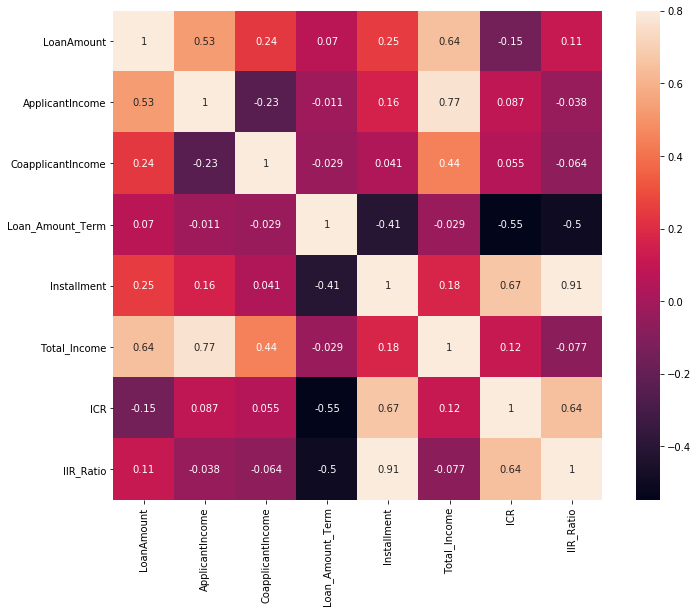

In [32]:
master.info()
contvars=master[['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Installment','Total_Income','ICR','IIR_Ratio']]
#####CORRELATION MATRIX######
#correlation matrix
corrmat = contvars.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot = True,square=True);

In [34]:
##########MODEL BUILDING###########

master= pd.get_dummies(master, columns=cat)
master.head()

X = master[master['Loan_Status'].isnull()!=True].drop(['Loan_ID','Loan_Status'], axis=1)
y = master[master['Loan_Status'].isnull()!=True]['Loan_Status']

X_test = master[master['Loan_Status'].isnull()==True].drop(['Loan_ID','Loan_Status'], axis=1)

X.shape, y.shape, X_test.shape



((614, 38), (614,), (367, 38))

In [35]:
########SPLITTING#####
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
print(X.shape)
y_val.head()

(614, 38)


306    Y
217    Y
561    Y
81     Y
547    Y
Name: Loan_Status, dtype: object

In [36]:
#LABEL ENCODER#
number = LabelEncoder()
y_val=number.fit_transform(y_val.astype('str'))
y_train=number.fit_transform(y_train.astype('str'))

In [37]:
###SCALING##

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)


In [36]:
#declare the models\

seed=0
import sklearn.ensemble as ensemble

lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(x_train,x_val, y_train, y_val):
    for model in models:
            model.fit(x_train, y_train)
            y_test_pred = model.predict(x_val)
            y_test_pred_new=model.predict_proba(x_val)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(x_train,y_train)
            test_score=model.score(x_val,y_val)
            p_score=metrics.precision_score(y_val,y_test_pred)
            r_score=metrics.recall_score(y_val,y_test_pred)
            
            ac=metrics.accuracy_score(y_val,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(x_train,x_val, y_train, y_val)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall
0,Bagging,0.847654,0.997963,0.813008,0.858696,0.887640
1,Random Forest,0.832287,1.000000,0.829268,0.846939,0.932584
2,KNN,0.769828,0.824847,0.821138,0.831683,0.943820
3,Logistic Regression,0.737938,0.816701,0.804878,0.821782,0.932584
4,bagged LR,0.729346,0.818737,0.813008,0.830000,0.932584
5,Naive-Bayes,0.716292,0.338086,0.276423,0.500000,0.011236
6,Ada boost,0.702082,0.863544,0.813008,0.823529,0.943820
7,Decistion Tree,0.657964,1.000000,0.715447,0.813953,0.786517


In [38]:
###########SMOTE############3
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

Using TensorFlow backend.


In [39]:
seed=0
import sklearn.ensemble as ensemble
import sklearn.metrics as metrics


X=X_smote
y=y_smote
X_trains, X_vals, y_trains, y_vals = train_test_split(X,y, test_size = 0.2, random_state =1)



#LABEL ENCODER#
number = LabelEncoder()
y_vals=number.fit_transform(y_vals.astype('str'))
y_trains=number.fit_transform(y_trains.astype('str'))


###SCALING##

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_trains)
X_vals = scaler.transform(X_vals)


#declare the models
lr = LogisticRegression()
rf=RandomForestClassifier()
adb=ensemble.AdaBoostClassifier()
bgc=ensemble.BaggingClassifier()
gnb = GaussianNB()
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier()
# ab_rf = AdaBoostClassifier(base_estimator=rf,random_state=0)
# ab_dt = AdaBoostClassifier(base_estimator=dt,random_state=0)
# ab_nb=  AdaBoostClassifier(base_estimator=gnb,random_state=0)
# ab_lr=  AdaBoostClassifier(base_estimator=lr,random_state=0)
bgcl_lr = BaggingClassifier(base_estimator=lr, random_state=0)

# ,ab_rf,ab_dt,ab_nb,ab_lr,bgcl_lr

models=[lr,rf,adb,bgc,gnb,knn,dt,bgcl_lr]
sctr,scte,auc,ps,rs=[],[],[],[],[]
def ens(X_trains,X_vals, y_trains, y_vals):
    for model in models:
            model.fit(X_trains, y_trains)
            y_test_pred = model.predict(X_vals)
            y_test_pred_new=model.predict_proba(X_vals)
            y_test_pred_new=y_test_pred_new[:,1]
            train_score=model.score(X_trains,y_trains)
            test_score=model.score(X_vals,y_vals)
            p_score=metrics.precision_score(y_vals,y_test_pred)
            r_score=metrics.recall_score(y_vals,y_test_pred)
            
            ac=metrics.roc_auc_score(y_vals,y_test_pred_new)
            
            sctr.append(train_score)
            scte.append(test_score)
            ps.append(p_score)
            rs.append(r_score)
            auc.append(ac)
    return sctr,scte,auc,ps,rs
ens(X_trains,X_vals, y_trains, y_vals)
# 'ab_rf','ab_dt','ab_nb','ab_lr','bgcl_lr'
ensemble=pd.DataFrame({'names':['Logistic Regression','Random Forest','Ada boost','Bagging',
                                'Naive-Bayes','KNN','Decistion Tree',
                                'bagged LR'],
                       'auc_score':auc,'training':sctr,'testing':scte,'precision':ps,'recall':rs})
ensemble=ensemble.sort_values(by='auc_score',ascending=False).reset_index(drop=True)
ensemble

,names,auc_score,training,testing,precision,recall
0,Random Forest,0.929471,0.998519,0.869822,0.846154,0.868421
1,bagged LR,0.913696,0.865185,0.863905,0.804598,0.921053
2,Bagging,0.911856,0.988148,0.846154,0.828947,0.828947
3,Logistic Regression,0.906904,0.871111,0.863905,0.804598,0.921053
4,KNN,0.891200,0.882963,0.828402,0.764045,0.894737
5,Ada boost,0.884975,0.875556,0.857988,0.817073,0.881579
6,Naive-Bayes,0.853919,0.502222,0.556213,0.600000,0.039474
7,Decistion Tree,0.770444,0.998519,0.775148,0.763889,0.723684


In [1521]:
### RANDOM FOREST###
random_forest = RandomForestClassifier(n_estimators=1000, oob_score=True)
random_forest.fit(X_trains, y_trains)

Y_prediction = random_forest.predict(X_vals)

random_forest.score(X_trains, y_trains)
acc_random_forest = round(random_forest.score(X_trains, y_trains) * 100, 2)
print(acc_random_forest)
print(classification_report(y_vals,Y_prediction))
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

99.85
              precision    recall  f1-score   support

           0       0.86      0.87      0.87        93
           1       0.84      0.83      0.83        76

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169

oob score: 86.52 %


In [1175]:
# Use the forest's predict method on the test data
predictions = random_forest.predict(X_test)
submission = pd.DataFrame()
submission['Loan_ID'] = master[master['Loan_Status'].isnull()==True]['Loan_ID']
submission['Loan_Status'] = predictions
submission.to_csv('rfss.csv', index=False, header=True)
submission.shape

(367, 2)

In [1522]:
#####FINDING BEST PARAMETER######
# Create the parameter grid based on the results of random search 
param_grid = {
    "criterion" : ["gini", "entropy"],
    'bootstrap': [True],
    'max_depth': [5,8,15,25,30],
    'max_features': [2,3],
    'min_samples_leaf': [1,2,5,10],
    'min_samples_split': [2,5,10,15,100],
    'n_estimators': [100,300,500,800,1200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 3)

# Fit the grid search to the data
grid_search.fit(X_trains, y_trains)
grid_search.best_params_

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 22.7min finished


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [1524]:
# MAKE RF BASE ON THAT PARAMETER####
rf2 = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       max_features= 3,
                                       max_depth=30,
                                       min_samples_split = 2,
                                       n_estimators=500,oob_score=True,  
                                       n_jobs=-1)

rf2.fit(X_trains, y_trains)
Y_prtu = rf2.predict(X_vals)
rf2.score(X_trains, y_trains)
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rf2, X_trains, y_trains, cv=3)
confusion_matrix(y_trains, predictions)
print(classification_report(y_vals,Y_prtu))
acc_rf = round(rf2.score(X_trains, y_trains) * 100, 2)
print(acc_rf)
print("oob score:", round(rf.oob_score_, 4)*100, "%")

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        93
           1       0.84      0.83      0.83        76

    accuracy                           0.85       169
   macro avg       0.85      0.85      0.85       169
weighted avg       0.85      0.85      0.85       169

99.85


AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [1475]:
prediction = rf.predict(X_test)
submission = pd.DataFrame()
submission['Loan_ID'] = master[master['Loan_Status'].isnull()==True]['Loan_ID']
submission['Loan_Status'] = prediction
submission.to_csv('rf.csv', index=False, header=True)
submission.shape

(367, 2)

In [1184]:
##RANDOM SEARCH CV###

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfs = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfs, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_trains, y_trains)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [1185]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [1192]:
# MAKE RF BASE ON THAT PARAMETER####
rfs = RandomForestClassifier(n_estimators=1200,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'sqrt',
 max_depth= 70,
 bootstrap= False)


rfs.fit(X_trains, y_trains)
Y_prtus = rfs.predict(X_vals)
rfs.score(X_trains, y_trains)
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rfs, X_trains, y_trains, cv=3)
confusion_matrix(y_trains, predictions)
print(classification_report(y_vals,Y_prtus))
acc_rf = round(rfs.score(X_trains, y_trains) * 100, 2)
print(acc_rf)
print("oob score:", round(rf.oob_score_, 4)*100, "%")

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        93
           1       0.85      0.88      0.86        76

    accuracy                           0.88       169
   macro avg       0.87      0.88      0.87       169
weighted avg       0.88      0.88      0.88       169

96.3
oob score: 83.7 %


In [1199]:
##GBM###

##GBM##

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    ypreds=gb_clf.fit(X_trains, y_trains)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(ypreds.score(X_trains, y_trains)))
    print("Accuracy score (validation): {0:.3f}".format(ypreds.score(X_vals, y_vals)))
    
    
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_trains, y_trains)
predictions = gb_clf2.predict(X_vals)

acc_gbm = round(gb_clf2.score(X_trains, y_trains) * 100, 2)
print(acc_gbm)
print("Confusion Matrix:")
print(confusion_matrix(y_vals, predictions))

print("Classification Report")
print(classification_report(y_vals, predictions))

Learning rate:  0.05
Accuracy score (training): 0.833
Accuracy score (validation): 0.828
Learning rate:  0.075
Accuracy score (training): 0.833
Accuracy score (validation): 0.828
Learning rate:  0.1
Accuracy score (training): 0.836
Accuracy score (validation): 0.828
Learning rate:  0.25
Accuracy score (training): 0.841
Accuracy score (validation): 0.840
Learning rate:  0.5
Accuracy score (training): 0.852
Accuracy score (validation): 0.828
Learning rate:  0.75
Accuracy score (training): 0.853
Accuracy score (validation): 0.828
Learning rate:  1
Accuracy score (training): 0.868
Accuracy score (validation): 0.846
86.81
Confusion Matrix:
[[78 15]
 [11 65]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        93
           1       0.81      0.86      0.83        76

    accuracy                           0.85       169
   macro avg       0.84      0.85      0.85       169
weighted avg       0.85      0.85      0.85 

In [1200]:
prediction = gb_clf2.predict(X_test)
submission = pd.DataFrame()
submission['Loan_ID'] = master[master['Loan_Status'].isnull()==True]['Loan_ID']
submission['Loan_Status'] = prediction
submission.to_csv('rfsd.csv', index=False, header=True)
submission.shape

(367, 2)

In [1267]:
###XGB CLASSIFIER###
import xgboost
params = {
    'learning_rate'   : [0.05,0.3,0.10,0.15,0.20],
    'max_depth'       : [3,4,5,6,8,10],
    'gamma'           : [0.0,0.1,0.2,0.3,0.4],
    'n_estimators'    : range(100,1000,100),
    'colsample_bytree': [0.3,0.4,0.5,0.7]
}


model_xg2 = xgboost.XGBClassifier()
xgb_rand_cv = RandomizedSearchCV(estimator=model_xg2,
                             param_distributions=params,n_iter=5,
                            scoring='accuracy',cv=5,n_jobs=-1)

xgb_rand_cv.fit(X_trains,y_trains)

pred_xgb = xgb_rand_cv.predict(X_vals)
print(classification_report(y_vals,pred_xgb))
print('\n')
print(confusion_matrix(y_vals,pred_xgb))


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        93
           1       0.84      0.84      0.84        76

    accuracy                           0.86       169
   macro avg       0.86      0.86      0.86       169
weighted avg       0.86      0.86      0.86       169



[[81 12]
 [12 64]]


In [ ]:
# defining parameter range SVM TUNNING
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly','linear']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_trains, y_trains) 
grid_search.best_params_

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.511, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.511, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.511, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.511, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.519, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.770, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.770, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.726, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.674, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=0.741, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

In [39]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X_trains, y_trains)


def hypertuning_rscv(est, p_distr, nbr_iter,X_trains,y_trains):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X_trains,y_trains)
    rdmsearch.best_params_
    
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score



In [42]:
rf_parameters

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 2,
 'n_estimators': 300}

In [44]:
# MAKE RF BASE ON THAT PARAMETER####
rfs = RandomForestClassifier(n_estimators=300,
 criterion='entropy',
 min_samples_leaf= 2,
 max_features= 1,
 max_depth= None,
 bootstrap= True)


rfs.fit(X_trains, y_trains)
Y_prtus = rfs.predict(X_vals)
rfs.score(X_trains, y_trains)
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(rfs, X_trains, y_trains, cv=3)
confusion_matrix(y_trains, predictions)
print(classification_report(y_vals,Y_prtus))
acc_rf = round(rfs.score(X_trains, y_trains) * 100, 2)
print(acc_rf)
print("oob score:", round(rf.oob_score_, 4)*100, "%")

              precision    recall  f1-score   support

           0       0.89      0.88      0.89        93
           1       0.86      0.87      0.86        76

    accuracy                           0.88       169
   macro avg       0.87      0.88      0.87       169
weighted avg       0.88      0.88      0.88       169

96.3


AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

# ANN#

In [62]:

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 11, init = 'he_uniform',activation='relu',input_dim = 38))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 11, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_trains, y_trains,validation_split=0.33, batch_size = 10, nb_epoch = 100)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Train on 452 samples, validate on 223 samples
Epoch 1/100
452/452 [==============================] - 0s 304us/step - loss: 0.6725 - accuracy: 0.5885 - val_loss: 0.6702 - val_accuracy: 0.6413
Epoch 2/100
452/452 [==============================] - 0s 99us/step - loss: 0.6428 - accuracy: 0.6460 - val_loss: 0.6524 - val_accuracy: 0.6726
Epoch 3/100
452/452 [==============================] - 0s 95us/step - loss: 0.6216 - accuracy: 0.7146 - val_loss: 0.6376 - val_accuracy: 0.6906
Epoch 4/100
452/452 [==============================] - 0s 110us/step - loss: 0.6039 - accuracy: 0.7478 - val_loss: 0.6238 - val_accuracy: 0.7175
Epoch 5/100
452/452 [==============================] - 0s 94us/step - loss: 0.5878 - accuracy: 0.7721 - val_loss: 0.6095 - val_accuracy: 0.7578
Epoch 6/100
452/452 [==============================] - 0s 93us/step - loss: 0.5726 - accuracy: 0.7699 - val_loss: 0.5965 - val_accuracy: 0.7713
Epoch 7/100
452/452 [==============================] - 0s 106us/step - loss: 0.5590 - ac

KeyError: 'acc'

In [63]:
# Predicting the Test set results
y_pred = classifier.predict(X_vals)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_vals, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_vals)
score
print(classification_report(y_vals,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        93
           1       0.84      0.91      0.87        76

    accuracy                           0.88       169
   macro avg       0.88      0.88      0.88       169
weighted avg       0.88      0.88      0.88       169



# FINDING HIDDEN LAYERS#

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout


def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_trains.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_trains, y_trains)
[grid_result.best_score_,grid_result.best_params_]

[0.7748148202896118,
 {'activation': 'sigmoid',
  'batch_size': 128,
  'epochs': 30,
  'layers': (45, 30, 15)}]